 # <center>Titanic Survival Statistics</center>
<center>Available [kaggle.com](https://www.kaggle.com/c/titanic/data)</center>

## Questions:

Although many question *why* the titanic sank, the main question this dataset may help with is **what factors lead to a higher rate of survival for passengers onboard the titanic?**

Factors to inspect from this data set include:
* Class
* Sex
* Age
* Family Onboard
* Ticket #
* Fare
* Destination



In [49]:
import unicodecsv

# Read in CSV file. This definition is provided by Udacity.com, and is the only direct copy of outside code
def read_csv(filename):
    '''Returns a dictionary of the CSV file'''
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

tdata = read_csv('titanic_data.csv')

## Fix Data

In [50]:
def parse_ticket(ticket):
    '''Takes a ticket string and returns only the numerical value of the ticket number. The numerical value is always the last
    part of the string.'''
    if ticket == '':
        return None
    else:
        ticket_reverse_split = ticket[::-1].split(' ', 1)
        ticket_num = ticket_reverse_split[0][::-1]
    try:
        return int(ticket_num)
    except:
        return None
    
def parse_int(number):
    '''Returns number string as int. Returns "None" if empty'''
    if number == "":
        return None
    return int(number)
    
def parse_float(number):
    '''Returns number string as float. Returns "None" if empty'''
    if number == "":
        return None
    return float(number) 

def parse_string(string):
    '''Returns empty string value as "None"'''
    if string == "":
        return None
    return string

# Clean up data in titanic data table
for data in tdata:
    data['Survived'] = parse_int(data['Survived'])
    data['Pclass'] = parse_int(data['Pclass'])
    data['Age'] = parse_float(data['Age'])
    data['SibSp'] = parse_int(data['SibSp'])
    data['Parch'] = parse_int(data['Parch'])
    data['Ticket'] = parse_ticket(data['Ticket'])
    data['Fare'] = parse_float(data['Fare'])
    data['Cabin'] = parse_string(data['Cabin'])
    data['Embarked'] = parse_string(data['Embarked'])


In [51]:
# Define function to generate lists
def list_maker(data, key, value):
    '''Returns dataset with desired key value'''
    data_true = []
    for element in data:
        item = []
        if element[key] == value:
            data_true.append(element)
    return data_true

# Define simple percent function
def percent(part, whole):
    '''Returns float percent of part / whole'''
    return float(part)/float(whole) * 100

# Generate survivor and not_survivor lists
survivors = list_maker(tdata, "Survived", 1)
not_survivors = list_maker(tdata, "Survived", 0)
num_surv = len(survivors)
num_not_surv = len(not_survivors)
total_passengers = num_surv + num_not_surv

print "Sample Total Passengers: " + str(total_passengers)
print "Sample Survived Passengers: " + str(num_surv)
print "Sample Survival Percent: " + "%.2f" % percent(num_surv, total_passengers) + "%"

Sample Total Passengers: 891
Sample Survived Passengers: 342
Sample Survival Percent: 38.38%


## Inspect Percent Survivors by Class

In [52]:
# Inspect factor CLASS from key "Pclass"
    
# Find number of survivors based on class
num_surv_low = len(list_maker(survivors, "Pclass", 3))
num_surv_mid = len(list_maker(survivors, "Pclass", 2))
num_surv_up = len(list_maker(survivors, "Pclass", 1))

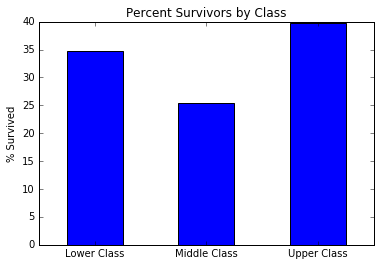

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

x_values = [1,2,3]
y_values = [percent(num_surv_low, num_surv), percent(num_surv_mid, num_surv), percent(num_surv_up, num_surv)]
labels = ["Lower Class", "Middle Class", "Upper Class"]

plt.bar(x_values, y_values, align='center', width=.5)
plt.xticks(x_values, labels)
plt.ylabel("% Survived")
plt.title("Percent Survivors by Class")

plt.show()